<a href="https://colab.research.google.com/github/nilamaula26/Praktikum-Kuliah/blob/main/Linear_Regression_Laporan_PKL_cadangan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
dataset= pd.read_csv("/content/data bencana.csv")
dataset.head(12)

,curah_hujan,jumlah_bencana
0,471.93,9
1,511.53,8
2,263.53,1
3,184.14,0
4,310.00,0
5,189.53,2
6,130.13,0
7,96.87,0
8,104.17,0
9,412.87,3


In [110]:
print("Jumlah dataset saya: "+str(len(dataset.index)))

Jumlah dataset saya: 12


In [111]:
dataset.describe()

,curah_hujan,jumlah_bencana
count,12.000000,12.000000
mean,283.603333,2.416667
std,147.412379,3.369875
min,96.870000,0.000000
25%,170.637500,0.000000
50%,276.100000,0.500000
75%,419.620000,3.750000
max,511.530000,9.000000


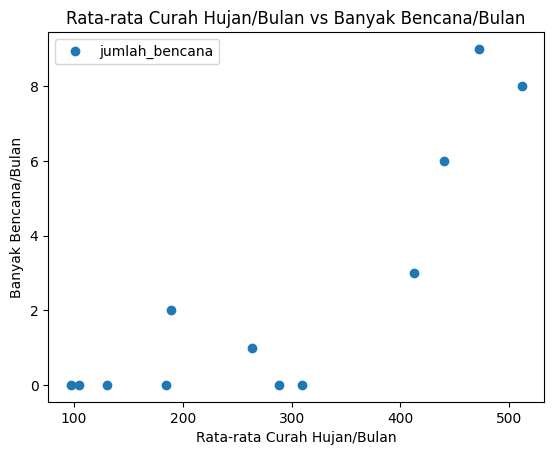

In [112]:
dataset.plot(x='curah_hujan', y='jumlah_bencana', style='o')
plt.title('Rata-rata Curah Hujan/Bulan vs Banyak Bencana/Bulan')
plt.xlabel('Rata-rata Curah Hujan/Bulan')
plt.ylabel('Banyak Bencana/Bulan')
plt.show()

Penentuan variabel dan pembagian data

In [113]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [115]:
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [168]:
r2_scores = []
cv = KFold(n_splits=3, random_state=21, shuffle=True)
for train_index, test_index in cv.split(x):
  x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
  # Initialize and fit a linear regression model on the training data
  model = LinearRegression()
  model.fit(x_train, y_train)
  # Make predictions on the test data and compute the R-squared score
  y_pred = model.predict(x_test)
  r2 = r2_score(y_test, y_pred)
  # Store the R-squared score for this fold
  r2_scores.append(r2)

# Compute the average R-squared score across all folds
avg_r2 = sum(r2_scores) / len(r2_scores)

print("Average R-squared score:", avg_r2)

Average R-squared score: 0.7005002739884526


In [162]:
#regressor = LinearRegression()

In [153]:
#regressor.fit(x_train, y_train)

In [154]:
#y_pred = regressor.predict(x_test)

In [155]:
print(model.intercept_)

-1.0778635531353085


In [156]:
print(model.coef_)

[7.99271442]


In [157]:
dataframe = pd.DataFrame({'Data Sebenarnya': y_test, 'Data Prediksi': y_pred})
dataframe

,Data Sebenarnya,Data Prediksi
0,9,6.151547
1,0,3.030291
2,0,-0.937154
3,3,5.013145


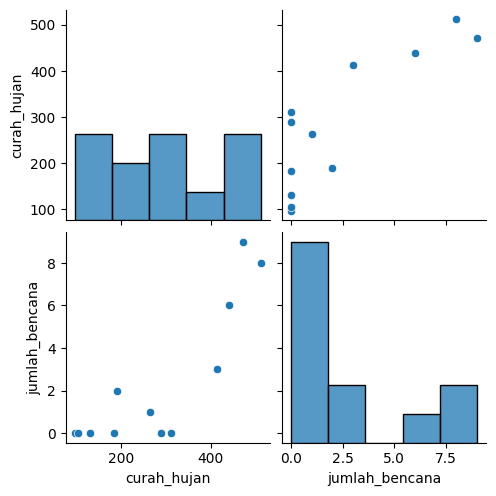

In [143]:
sns.pairplot(dataset)

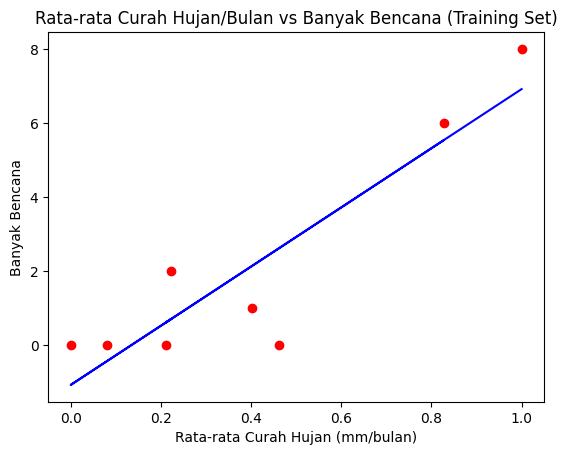

In [144]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Rata-rata Curah Hujan/Bulan vs Banyak Bencana (Training Set)')
plt.xlabel('Rata-rata Curah Hujan (mm/bulan)')
plt.ylabel('Banyak Bencana')
plt.show()

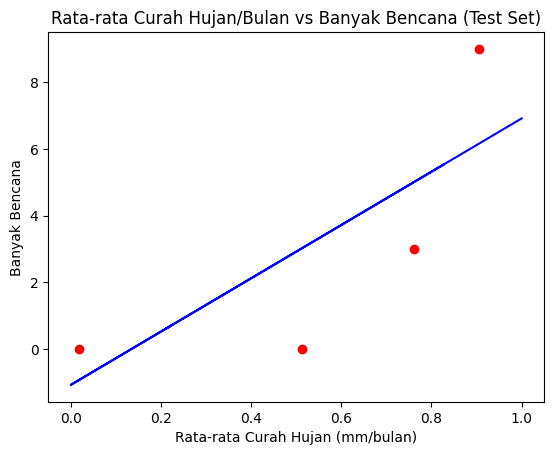

In [145]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Rata-rata Curah Hujan/Bulan vs Banyak Bencana (Test Set)')
plt.xlabel('Rata-rata Curah Hujan (mm/bulan)')
plt.ylabel('Banyak Bencana')
plt.show()